In [1]:
# xmlrpc_client.ipynb

# import xmlrpclib
import xmlrpc.client as xmlrpclib
import pickle
import pandas as pd

server = xmlrpclib.ServerProxy("http://127.0.0.1:8008")

print('Ping:', server.ping())

print('Server datetime:', server.now())

print('View, type, value:', server.type(2))
print('View, type, value:', server.type(2.))
print('View, type, value:', server.type('My string'))
print('View, type, value:', server.type("My string"))
print('View, type, value:', server.type([1,2,3]))
print('View, type, value:', server.type(["one", "two", "three"]))
print('View, type, value:', server.type((1,2,"3")))

print('Sum 2 + 3 :', server.sum(2, 3))
print('Pow 2^3: ', server.pow(2, 3))

Ping: True
Server datetime: 20250920T12:21:18
View, type, value: ['2', "<class 'int'>", 2]
View, type, value: ['2.0', "<class 'float'>", 2.0]
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['My string', "<class 'str'>", 'My string']
View, type, value: ['[1, 2, 3]', "<class 'list'>", [1, 2, 3]]
View, type, value: ["['one', 'two', 'three']", "<class 'list'>", ['one', 'two', 'three']]
View, type, value: ["[1, 2, '3']", "<class 'list'>", [1, 2, '3']]
Sum 2 + 3 : 5
Pow 2^3:  8


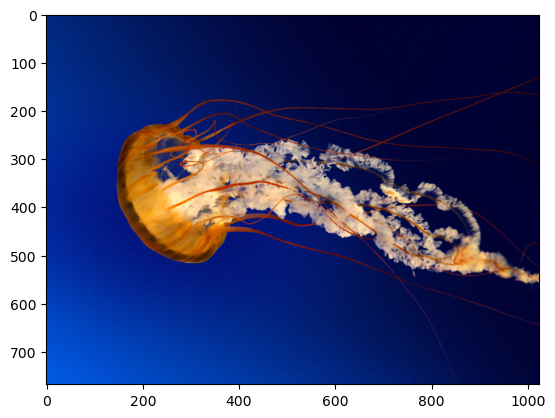

In [2]:
from PIL import Image # Работа с изображением
# from pylab import * # Отображение
import matplotlib.pyplot as plt
# import xmlrpclib

# Режим отображения внутри ноутбука
%matplotlib inline

img = Image.open('Jellyfish.jpg')

# img_arr = array(img)
img_arr = plt.imread('Jellyfish.jpg')

# Исходное изображение
# imshow(img_arr)

plt.imshow(img_arr)
plt.show()

Ping: True


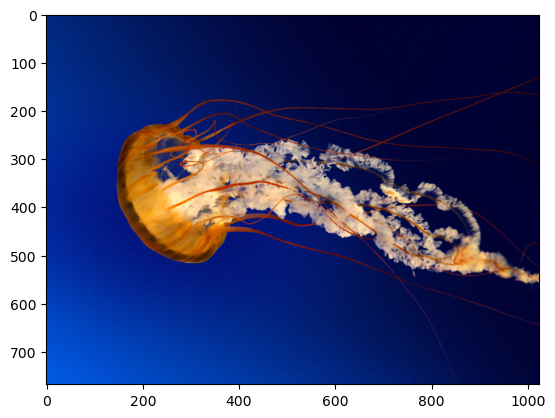

In [3]:
from xmlrpc.client import ServerProxy, Binary

# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = Binary(pimg)
print('Ping:', server.ping())
img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
plt.imshow(img_arr2)
plt.show()

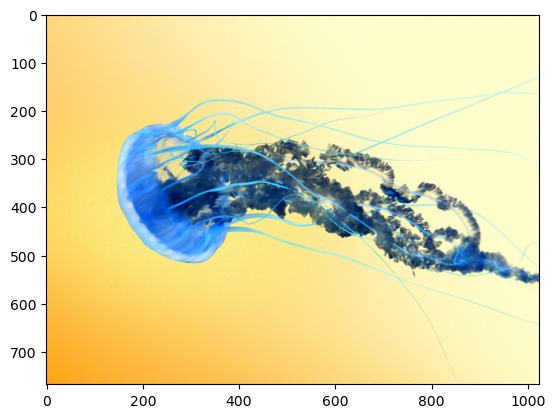

In [4]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = xmlrpclib.Binary(pimg)
    
    img_bin2 = server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
plt.imshow(img_arr_inv)
plt.show()

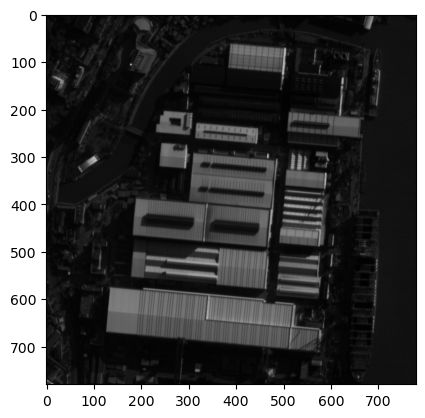

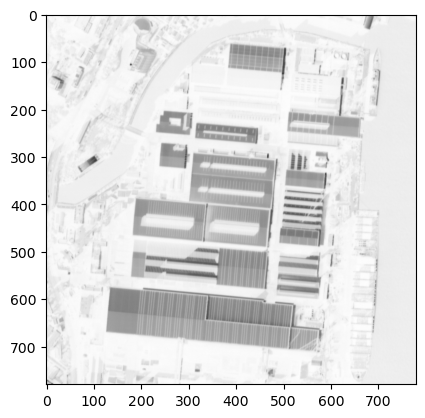

In [5]:
img = Image.open('11.bmp')
plt.imshow(img)
plt.show()

# img_arr = array(img)
img_arr = plt.imread('11.bmp')

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
plt.imshow(img_arr_inv)
plt.show()

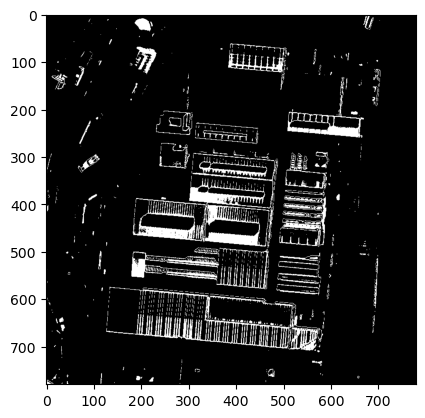

In [6]:
from PIL import Image
import matplotlib.pyplot as plt
from xmlrpc.client import ServerProxy, Binary
import pickle
import numpy as np

def make_bin(img_arr_in, board=50):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)

    img_bin2 = server.send_back_binarization(img_bin, board)

    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr = plt.imread('Jellyfish.jpg') # ~30
img_arr = plt.imread('11.bmp') #
img_arr_bin = make_bin(img_arr, 50)

# Изображение с бинарной маской по порогу
plt.imshow(img_arr_bin)
plt.show()

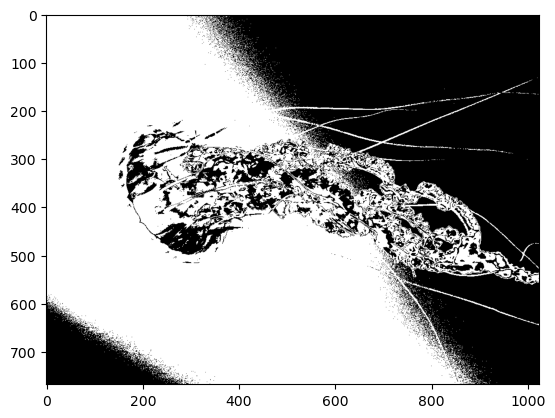

In [7]:
img_arr = plt.imread('Jellyfish.jpg') # ~30
img_arr_bin = make_bin(img_arr, 30)

# Изображение с бинарной маской по порогу
plt.imshow(img_arr_bin)
plt.show()

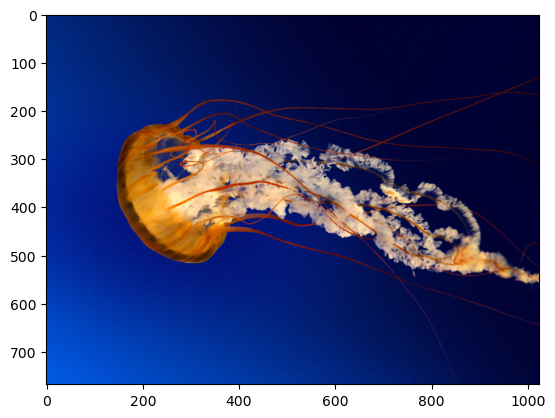

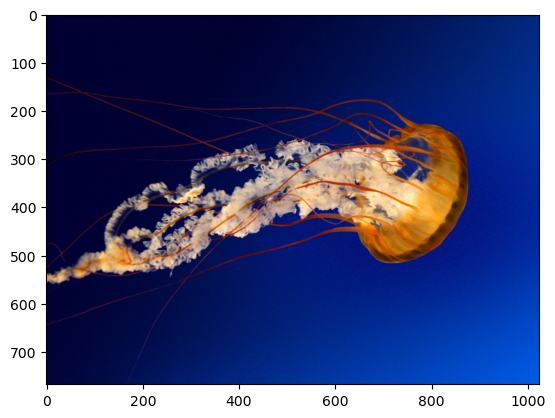

In [8]:
from PIL import Image
import matplotlib.pyplot as plt
from xmlrpc.client import ServerProxy, Binary
import pickle
import numpy as np

def make_flip(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)

    img_bin2 = server.send_back_flip_vertical(img_bin)

    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr = plt.imread('Jellyfish.jpg') # ~30
# img_arr = plt.imread('11.bmp') #

plt.imshow(img_arr)
plt.show()

img_arr_flip = make_flip(img_arr)

# Изображение с разворотом по вертикали
plt.imshow(img_arr_flip)
plt.show()

In [9]:
print(server.black_list_check(u'Петров'))
print(server.black_list_check(u'Примеров'))


Петров: bad_boy
Примеров: good_boy


In [10]:
print(server.black_list_check_full("Иванов", "Иван", "Иванович", "22.03.1989"))
print(server.black_list_check_full("иванов", "Иван", "Иванович", "22.03.1989"))
print(server.black_list_check_full("петров", "Иван", "Иванович", "22.03.1989"))
print(server.black_list_check_full("Иванов", "Иван", "Иванович", "22.03.2026"))
print(server.black_list_check_full("Иванов", "Иван", "Иванович", "22-03-1989"))
print(server.black_list_check_full("Иванов", "Иван", "Иванович", "1989.03.22"))
print(server.black_list_check_full("Иванов", "Петр", "Иванович", "22.03.1989"))

Иванов Иван Иванович (22.03.1989): yes good boy
Иванов Иван Иванович (22.03.1989): yes good boy
Петров Иван Иванович (22.03.1989): no, bad boy
Ошибка: Дата рождения '22.03.2026' не может быть позже текущей даты
Ошибка: Неверный формат даты '22-03-1989'. Ожидается DD.MM.YYYY (например, 22.03.1989)
Ошибка: Неверный формат даты '1989.03.22'. Ожидается DD.MM.YYYY (например, 22.03.1989)
Иванов Петр Иванович (22.03.1989): no, bad boy


# Лабораторная работа 2

In [1]:
import xmlrpc.client as xmlrpclib
import pickle

server = xmlrpclib.ServerProxy("http://127.0.0.1:8008")

print('Ping:', server.ping())

print('Server datetime:', server.now())

Ping: True
Server datetime: 20250922T19:59:03


1.	Доработать функционал сервера в части функции проверки на наличие человека в черном списке. Функция должна быть нечувствительна к регистру символов. Доработать функцию на сравнивание с полями ФИО с допуском отличия друг от друга на одну букву любого поля (Семён равно Семен, Михаил равно Мехаил).  В случае полного совпадения возвращать введенные данные + «yes». В случае частичного совпадения  возвращать список подобных значений + «similar». В ином случае возвращать введенные данные + «no».

In [2]:
print(server.black_list_check_full("Уванов", "Уван", "Уванович", "22.03.1989"))
print(server.black_list_check_full("Иванов", "Иван", "Иванович", "22.03.1989"))

print(server.black_list_check_full("иванов", "Иван", "Иванович", "22.03.1989"))
print(server.black_list_check_full("петров", "Иван", "Иванович", "22.03.1989"))
print(server.black_list_check_full("Иванов", "Иван", "Иванович", "22.03.2026"))
print(server.black_list_check_full("Иванов", "Иван", "Иванович", "22-03-1989"))
print(server.black_list_check_full("Иванов", "Иван", "Иванович", "1989.03.22"))
print(server.black_list_check_full("Иванов", "Петр", "Иванович", "22.03.1989"))
print(server.black_list_check_full("Ивонов", "Иван", "Иванович", "22.03.1989"))
print(server.black_list_check_full("Иванов", "еван", "Иванович", "22.03.1989"))
print(server.black_list_check_full("Иванов", "Иван", "Пванович", "22.03.1989"))
print(server.black_list_check_full("Иванов", "Ииван", "Иванович", "22.03.1989"))
print(server.black_list_check_full("Иванов", "Иван", "Ивановч", "22.03.1989"))
print()
print(server.black_list_check_full("Скалина", "Светлана", "Алексеевна", "19.11.1985"))
print()
print(server.black_list_check_full("Скалана", "Светлана", "Алексеевна", "19.11.1985"))


Иванов Иван Иванович (22.03.1989), Уванов Иван Иванович (22.03.1989): similar good boy
Иванов Иван Иванович (22.03.1989): yes good boy
Иванов Иван Иванович (22.03.1989): yes good boy
Петров Иван Иванович (22.03.1989): no, bad boy
Ошибка: Дата рождения '22.03.2026' не может быть позже текущей даты
Ошибка: Неверный формат даты '22-03-1989'. Ожидается DD.MM.YYYY (например, 22.03.1989)
Ошибка: Неверный формат даты '1989.03.22'. Ожидается DD.MM.YYYY (например, 22.03.1989)
Иванов Петр Иванович (22.03.1989): no, bad boy
Иванов Иван Иванович (22.03.1989): similar good boy
Иванов Иван Иванович (22.03.1989), Уванов Иван Иванович (22.03.1989): similar good boy
Иванов Иван Иванович (22.03.1989), Уванов Иван Иванович (22.03.1989): similar good boy
Иванов Иван Иванович (22.03.1989), Уванов Иван Иванович (22.03.1989): similar good boy
Иванов Иван Иванович (22.03.1989), Уванов Иван Иванович (22.03.1989): similar good boy

Скалина Светлана Алексеевна (19.11.1985): yes good boy

Скалина Светлана Алексее

2.	Доработать функционал сервера в части функции бинаризации изображения. Ввести новую функцию, которая будет бинаризировать изображение и возвращать процент пикселей с больше порога (простая функция «оценки процента облачности изображения»).

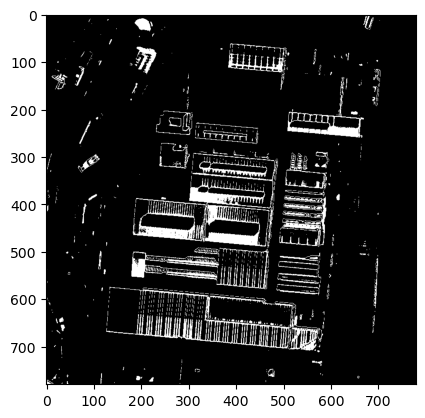

In [4]:
import matplotlib.pyplot as plt
from xmlrpc.client import Binary
import pickle

def make_bin(img_arr_in, board=50):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)

    img_bin2 = server.send_back_binarization(img_bin, board)

    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr = plt.imread('Jellyfish.jpg') # ~30
img_arr = plt.imread('11.bmp') #
img_arr_bin = make_bin(img_arr, 50)

# Изображение с бинарной маской по порогу
plt.imshow(img_arr_bin)
plt.show()

In [5]:
from xmlrpc.client import Binary
import pickle

def make_bin_with_percent(img_arr_in, board=50):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)

    img_bin2, percent = server.send_back_binarization_with_percent(img_bin, board)

    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out, percent

Процент пикселей больше порога 50 равен: 33.21%


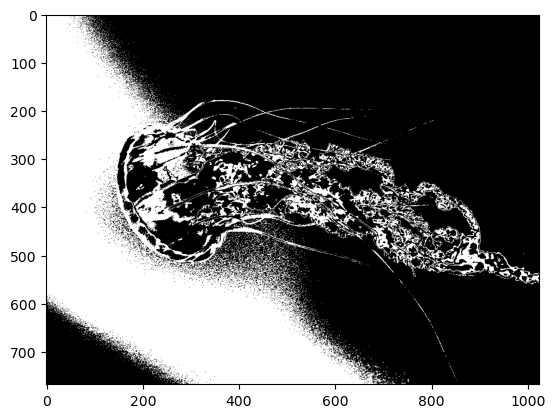

In [6]:
import matplotlib.pyplot as plt

board = 50
img_arr = plt.imread('Jellyfish.jpg') # ~30
img_arr_bin, percent = make_bin_with_percent(img_arr, board)

# Изображение с бинарной маской по порогу
print(f'Процент пикселей больше порога {board} равен: {percent:.2f}%')
plt.imshow(img_arr_bin)
plt.show()

Процент пикселей больше порога 50 равен: 8.46%


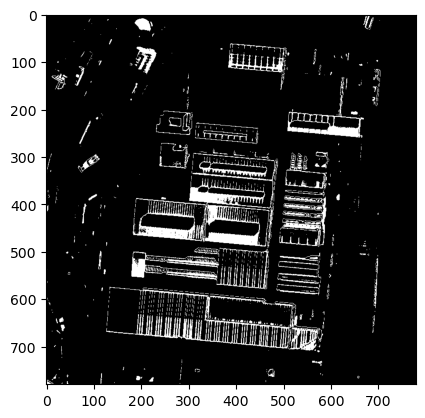

In [11]:
import matplotlib.pyplot as plt

board = 50
img_arr = plt.imread('11.bmp')
img_arr_bin, percent = make_bin_with_percent(img_arr, board)

# Изображение с бинарной маской по порогу
print(f'Процент пикселей больше порога {board} равен: {percent:.2f}%')
plt.imshow(img_arr_bin)
plt.show()

3.	Создать тетрадь «xmlrpc_stats_server.ipynb» с  отдельный сервер сервиса статистики. В этот сервис должны приходить события работы функций сервера «xmlrpc_server.ipynb».

In [2]:
import xmlrpc.client as xmlrpclib
import pickle

stats_server = xmlrpclib.ServerProxy("http://127.0.0.1:8018")

print('Ping:', stats_server.ping())

print('Server datetime:', stats_server.now())


Ping: True
Server datetime: 20250922T19:59:11


4.	Регистрироваться должны время события, тип события сервера (по типу выполняемой операции). Сохранять журнал событий в файл формата CSV. При отсутствии работы (выключенном) сервере «xmlrpc_stats_server.ipynb» работа функций сервера «xmlrpc_server.ipynb» должна выполняться.

In [4]:
import pandas as pd

count_lines_for_print = 10

try:
    df = pd.read_csv('logs.csv', header=None, names=['Event', 'Timestamp'], sep=';', encoding='utf-8', on_bad_lines='skip')
    print(df.head(count_lines_for_print))
except FileNotFoundError:
    print("Файл logs.csv не найден")
except pd.errors.EmptyDataError:
    print("Файл logs.csv пуст")
except Exception as e:
    print(f"Ошибка при чтении файла: {e}")

                                     Event            Timestamp
0                                     ping  2025-09-20 11:49:38
1                                      now  2025-09-20 11:49:38
2  black_list_check_full RES: yes good boy  2025-09-20 11:49:40
3  black_list_check_full RES: yes good boy  2025-09-20 11:49:40
4                     levenshtein_distance  2025-09-20 11:49:40
5                     levenshtein_distance  2025-09-20 11:49:40
6                     levenshtein_distance  2025-09-20 11:49:40
7                     levenshtein_distance  2025-09-20 11:49:40
8                     levenshtein_distance  2025-09-20 11:49:40
9                     levenshtein_distance  2025-09-20 11:49:40


5.	Сервис статистики должен иметь настройку ограничения на максимальный размер журнала событий в количестве записей. При превышении размера сохранять существующий журнал событий под новым именем, содержащим дату сохранения в формате YYYMMDD_hhmmss. После этого создавать новый файл журнала событий и вести запись в него.



In [5]:
import os

try:
    print(os.listdir('logs'))
except FileNotFoundError:
    print("Папка 'logs' не найдена")
except PermissionError:
    print("Нет доступа к папке 'logs'")
except Exception as e:
    print(f"Ошибка: {e}")

['logs.csv', 'logs_20250920_120949.csv', 'logs_20250920_120950.csv', 'logs_20250922_190418.csv', 'logs_20250922_195150.csv']


 6. В рамках клиента «xmlrpc_client.ipynb» реализовать получение содержимого журнала событий сервера статистики с возможностью получения среза по типу выполняемой операции (события) и времени.

In [6]:
# Получение и фильтрация логов
def get_filtered_log(event_filter=False, start_time=False, end_time=False):
    try:
        # Передаем параметры фильтрации серверу
        log_entries = stats_server.get_log(event_filter, start_time, end_time)
        if not log_entries:
            print('Лог пуст или не найдены записи, соответствующие фильтру')
            return pd.DataFrame(columns=['Event', 'Timestamp'])

        df = pd.DataFrame(log_entries, columns=['Event', 'Timestamp'])
        return df
    except Exception as e:
        print(f'Ошибка при получении лога: {e}')
        return pd.DataFrame(columns=['Event', 'Timestamp'])

# Пример использования
try:
    df_all = get_filtered_log()
    print('Все логи:')
    print(df_all.head(10))
except Exception as e:
    print(f'Ошибка: {e}')

Все логи:
                                               Event            Timestamp
0            black_list_check_full RES: yes good boy  2025-09-22 19:51:50
1            black_list_check_full RES: yes good boy  2025-09-22 19:51:50
2             black_list_check_full RES: no, bad boy  2025-09-22 19:51:50
3  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-22 19:51:50
4  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-22 19:51:50
5  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-22 19:51:50
6             black_list_check_full RES: no, bad boy  2025-09-22 19:51:50
7        black_list_check_full RES: similar good boy  2025-09-22 19:51:50
8        black_list_check_full RES: similar good boy  2025-09-22 19:51:50
9        black_list_check_full RES: similar good boy  2025-09-22 19:51:50


In [7]:
try:
    df_all = get_filtered_log(event_filter="ERROR")
    print('Все логи:')
    print(df_all.head(10))
except Exception as e:
    print(f'Ошибка: {e}')

Все логи:
                                               Event            Timestamp
0  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-22 19:51:50
1  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-22 19:51:50
2  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-22 19:51:50
3  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-20 12:09:49
4  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-20 12:09:49
5  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-20 12:09:49
6  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-20 12:21:52
7  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-20 12:21:52
8  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-20 12:21:52
9  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-20 12:21:57


In [8]:
try:
    df_all = get_filtered_log(event_filter="ERROR", start_time="2025-09-20 12:21:53")
    print('Все логи:')
    print(df_all.head(10))
except Exception as e:
    print(f'Ошибка: {e}')

Все логи:
                                               Event            Timestamp
0  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-22 19:51:50
1  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-22 19:51:50
2  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-22 19:51:50
3  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-20 12:21:57
4  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-20 12:21:57
5  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-20 12:21:57
6  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-22 18:46:08
7  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-22 18:46:08
8  black_list_check_full ERROR: Ошибка: Неверный ...  2025-09-22 18:46:08
9  black_list_check_full ERROR: Ошибка: Дата рожд...  2025-09-22 19:04:18


In [9]:
try:
    df_all = get_filtered_log(event_filter="RES", end_time="2025-09-20 12:10:50")
    print('Все логи:')
    print(df_all.head(10))
except Exception as e:
    print(f'Ошибка: {e}')

Все логи:
                                         Event            Timestamp
0      black_list_check_full RES: yes good boy  2025-09-20 12:09:49
1      black_list_check_full RES: yes good boy  2025-09-20 12:09:49
2       black_list_check_full RES: no, bad boy  2025-09-20 12:09:49
3       black_list_check_full RES: no, bad boy  2025-09-20 12:09:49
4  black_list_check_full RES: similar good boy  2025-09-20 12:09:49
5  black_list_check_full RES: similar good boy  2025-09-20 12:09:50
6  black_list_check_full RES: similar good boy  2025-09-20 12:09:50
7  black_list_check_full RES: similar good boy  2025-09-20 12:09:50
8  black_list_check_full RES: similar good boy  2025-09-20 12:09:50


In [19]:
try:
    df_all = get_filtered_log(event_filter="bin")
    print('Все логи:')
    # print(df_all.head(10))
    print(df_all)
except Exception as e:
    print(f'Ошибка: {e}')

Все логи:
                                     Event            Timestamp
0      send_back_binarization with percent  2025-09-20 12:09:55
1      send_back_binarization_with_percent  2025-09-20 12:10:01
2   send_back_binarization without percent  2025-09-20 12:10:03
3      send_back_binarization_with_percent  2025-09-20 12:10:06
4   send_back_binarization without percent  2025-09-20 12:10:08
5                         send_back_binary  2025-09-20 12:21:23
6      send_back_binarization with percent  2025-09-20 12:21:40
7      send_back_binarization with percent  2025-09-20 12:21:44
8      send_back_binarization with percent  2025-09-20 12:22:02
9      send_back_binarization_with_percent  2025-09-20 12:22:08
10  send_back_binarization without percent  2025-09-20 12:22:10
11     send_back_binarization_with_percent  2025-09-20 12:22:14
12  send_back_binarization without percent  2025-09-20 12:22:16
13     send_back_binarization with percent  2025-09-22 18:46:19
14     send_back_binarization 

In [21]:
try:
    df_all = get_filtered_log(event_filter="bin", start_time="2025-09-20 12:10:00", end_time="2025-09-20 12:20:50")
    print('Все логи:')
    print(df_all.head(10))
except Exception as e:
    print(f'Ошибка: {e}')

Лог пуст или не найдены записи, соответствующие фильтру
Все логи:
Empty DataFrame
Columns: [Event, Timestamp]
Index: []


In [24]:
try:
    df_all = get_filtered_log(event_filter="bin", start_time="2025-09-20 12:10:00", end_time="2025-09-23 12:20:50")
    print('Все логи:')
    print(df_all)
except Exception as e:
    print(f'Ошибка: {e}')

Все логи:
                                     Event            Timestamp
0      send_back_binarization_with_percent  2025-09-20 12:10:01
1   send_back_binarization without percent  2025-09-20 12:10:03
2      send_back_binarization_with_percent  2025-09-20 12:10:06
3   send_back_binarization without percent  2025-09-20 12:10:08
4                         send_back_binary  2025-09-20 12:21:23
5      send_back_binarization with percent  2025-09-20 12:21:40
6      send_back_binarization with percent  2025-09-20 12:21:44
7      send_back_binarization with percent  2025-09-20 12:22:02
8      send_back_binarization_with_percent  2025-09-20 12:22:08
9   send_back_binarization without percent  2025-09-20 12:22:10
10     send_back_binarization_with_percent  2025-09-20 12:22:14
11  send_back_binarization without percent  2025-09-20 12:22:16
12     send_back_binarization with percent  2025-09-22 18:46:19
13     send_back_binarization with percent  2025-09-22 18:46:28
14     send_back_binarization_

In [17]:
import pandas as pd
from xmlrpc.client import ServerProxy
from datetime import datetime, timedelta
import ipywidgets as widgets
from IPython.display import display, clear_output


# Функция получения и фильтрации логов
def get_filtered_log(event_filter=None, start_time=None, end_time=None):
    try:
        log_entries = stats_server.get_log()
        if not log_entries:
            print('Лог пуст или файл logs.csv не найден')
            return pd.DataFrame(columns=['Event', 'Timestamp'])

        # Фильтруем строки, исключая возможный заголовок
        valid_entries = [entry for entry in log_entries if len(entry) == 2 and entry[1] != 'Timestamp']
        if not valid_entries:
            print('Нет валидных записей в логе')
            return pd.DataFrame(columns=['Event', 'Timestamp'])

        df = pd.DataFrame(valid_entries, columns=['Event', 'Timestamp'])

        if event_filter and event_filter != 'Все события':
            df = df[df['Event'].str.contains(event_filter, case=False, na=False)]

        if start_time or end_time:
            try:
                df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
                df = df.dropna(subset=['Timestamp'])  # Удаляем строки с невалидными датами
                if start_time:
                    df = df[df['Timestamp'] >= start_time]
                if end_time:
                    df = df[df['Timestamp'] <= end_time]
            except Exception as e:
                print(f'Ошибка при преобразовании времени: {e}')
                return pd.DataFrame(columns=['Event', 'Timestamp'])

        return df
    except Exception as e:
        print(f'Ошибка при получении лога: {e}')
        return pd.DataFrame(columns=['Event', 'Timestamp'])

# Получение уникальных меток событий
def get_unique_events():
    try:
        log_entries = stats_server.get_log()
        if not log_entries:
            return ['Все события']
        valid_entries = [entry for entry in log_entries if len(entry) == 2 and entry[1] != 'Timestamp']
        df = pd.DataFrame(valid_entries, columns=['Event', 'Timestamp'])
        unique_events = ['Все события'] + sorted(df['Event'].unique().tolist())
        return unique_events
    except Exception as e:
        print(f'Ошибка при получении меток: {e}')
        return ['Все события']

# Получение текущей даты и времени
now = datetime.now()
start_time_default = now - timedelta(hours=1)
end_time_default = now + timedelta(hours=1)

# Создание виджетов
event_dropdown = widgets.Dropdown(
    options=get_unique_events(),
    description='Событие:',
    value='Все события',
    style={'description_width': 'initial'}
)

start_date_picker = widgets.DatePicker(
    description='Начальная дата:',
    value=start_time_default.date(),
    style={'description_width': 'initial'}
)

start_time_picker = widgets.Text(
    description='Начальное время:',
    value=start_time_default.strftime('%H:%M:%S'),
    style={'description_width': 'initial'}
)

end_date_picker = widgets.DatePicker(
    description='Конечная дата:',
    value=end_time_default.date(),
    style={'description_width': 'initial'}
)

end_time_picker = widgets.Text(
    description='Конечное время:',
    value=end_time_default.strftime('%H:%M:%S'),
    style={'description_width': 'initial'}
)

apply_button = widgets.Button(
    description='Применить фильтры',
    button_style='success',
    tooltip='Нажмите для фильтрации логов'
)

output = widgets.Output()

# Обработчик нажатия кнопки
def on_apply_button_clicked(b):
    with output:
        clear_output()
        event_filter = event_dropdown.value
        start_date = start_date_picker.value
        start_time_str = start_time_picker.value
        end_date = end_date_picker.value
        end_time_str = end_time_picker.value

        start_time = None
        if start_date and start_time_str:
            try:
                start_time = datetime.strptime(
                    f'{start_date} {start_time_str}', '%Y-%m-%d %H:%M:%S')
            except ValueError:
                print('Ошибка: Неверный формат начального времени. Ожидается HH:MM:SS')
                return

        end_time = None
        if end_date and end_time_str:
            try:
                end_time = datetime.strptime(
                    f'{end_date} {end_time_str}', '%Y-%m-%d %H:%M:%S')
            except ValueError:
                print('Ошибка: Неверный формат конечного времени. Ожидается HH:MM:SS')
                return

        df = get_filtered_log(event_filter=event_filter if event_filter != 'Все события' else None,
                              start_time=start_time,
                              end_time=end_time)

        print(f'Отфильтрованные логи (всего записей: {len(df)}):')
        print(df)

# Привязываем обработчик к кнопке
apply_button.on_click(on_apply_button_clicked)

# Отображаем виджеты
display(event_dropdown, start_date_picker, start_time_picker, end_date_picker, end_time_picker, apply_button, output)

Dropdown(description='Событие:', options=('Все события', 'black_list_check RES: bad_boy', 'black_list_check RE…

DatePicker(value=datetime.date(2025, 9, 22), description='Начальная дата:', step=1, style=DescriptionStyle(des…

Text(value='17:48:37', description='Начальное время:', style=TextStyle(description_width='initial'))

DatePicker(value=datetime.date(2025, 9, 22), description='Конечная дата:', step=1, style=DescriptionStyle(desc…

Text(value='19:48:37', description='Конечное время:', style=TextStyle(description_width='initial'))

Button(button_style='success', description='Применить фильтры', style=ButtonStyle(), tooltip='Нажмите для филь…

Output()